# Checking a few

In [10]:
# imports
import os
import h5py
import pandas

from matplotlib import pyplot as plt
import seaborn as sns

from fronts.utils import plotting

# Load up

In [3]:
local_out_path = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Fronts')
outfile = os.path.join(local_out_path, 'LLC4320_SST144_SSS40_super_test.h5')
tbl_file = os.path.join(local_out_path, 'LLC4320_SST144_SSS40_super_test.parquet')

In [4]:
f = h5py.File(outfile, 'r')

In [5]:
tbl = pandas.read_parquet(tbl_file)

# Good one?

In [6]:
tbl.head()

,lat,lon,row,col,datetime,UID,filename,pp_file,pp_root,field_size,...,SSSmax,SSSmin,SSS10,SSS90,SSSmu,Divb2max,Divb2min,Divb210,Divb290,Divb2mu
0,56.752953,-170.447922,11465,10890,2011-09-30,13171467530955208,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,,dummy_file.json,64,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,56.796970,-155.677078,11469,11599,2011-09-30,131714679702432292,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,,dummy_file.json,64,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,56.818966,-155.635422,11471,11601,2011-09-30,131714681902436458,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,,dummy_file.json,64,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,56.631676,-152.864578,11454,11734,2011-09-30,131714663172713542,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,,dummy_file.json,64,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,56.917801,-152.114578,11480,11770,2011-09-30,131714691782788542,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,,dummy_file.json,64,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


# Plot a few

In [7]:
idx = 95 
sst = f['SST'][idx]
sss = f['SSS'][idx]
Divb2 = f['Divb2'][idx]

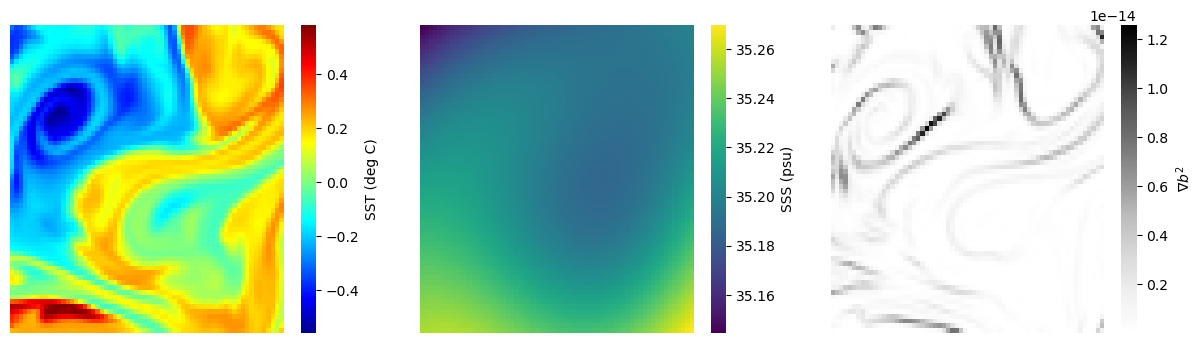

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
plotting.show_image(sst, clbl='SST (deg C)', ax=ax1)
plotting.show_image(sss, clbl='SSS (psu)', cm='viridis', ax=ax2)
plotting.show_image(Divb2, clbl=r'$\nabla b^2$', cm='Greys', ax=ax3)
#
plt.show()

## Histogram

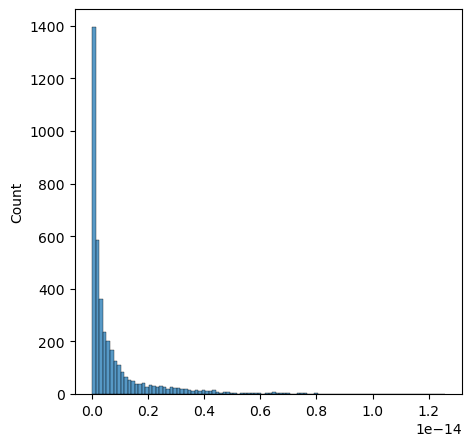

In [14]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

sns.histplot(Divb2.flatten(), bins=100)#, log_scale=True)
#
plt.show()